# Assignment 2: Implementation of Selection Sort


## Deliverables:

We will again generate random data for this assignment.  

    1) Please set up five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  
        Ensure that a common random number seed is used to generate each of the arrays. 
    2) Execute the base  algorithm (Selection Sort) for each of the random number arrays, noting the execution time with each execution. 
        Use one of the timing methods we learned in class.
    3) Just as in the last assignment, please organize the results of the study into a table showing the size of data array and the time taken to sort the array.
        Discuss the differences in timing and how they relate to data type and length of array. 
    4) Use Python matpl otlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis.
        The plot should show execution time against problem size for each form of the algorithm being tested.

### Prepare an exec summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# Discussion

### The selection sort algorithm as implemented below uses a nested for loop. The inner loop indentifies the smallest componenent of an array and it's index while the outer loop manipulates the arrays (adds the smallest element to the new array and removes the element from the parent array). Since we have these two for loops the algorithm grows at a rate of approximately n*n. There are two operations first we identify the smallest element, then we place it in the new array. In big O notation, this is denoted O(n^2). Figure 1 below shows the sort times as a function of the length of the array. It is apparent that the lowest point demonstrates the non-linear scaling of this algorithm which is confirmed by taking the square root of the time. Figure 2 shows the square root of time as a function of the length of the array and is approximately linear.

### In some data retrieval systems items are required to be indexed sequentially, so we need methodologies to sort them, selection sort provides this methodology in an easy to implement fashion, however it is not very efficient due to the nested operations. Below are the two functions, required for the sort:

    1) FindSmallest will start at the first index of an array and set it to an object 'smallest' which will be used in a repetative logical evaluation. 
       As we progress through the length of the array, each time the next value is smaller than smallest, smallest is replaced and it's index also is captured in smallest index. 
       This continues until the entire array is processed.

    2) SelectionSort will find use FindSmallest to search through a given array using FindSmallest in a nested fashion to find the smallest value ('small') in the given array and append it to a new array.
       The found value is removed from the original array (via it's returned index in FindSmallest; 'smallest_index') and the algorightm continues until the are no elements in the original array. The new array is returned along with the elapsed time to complete the sort in milliseconds.






In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import time

In [14]:
#FindSmallest will start at the first index of an array and set it to an object 'smallest' which will be used in a repetative logical evaluation. As we progress through the length of the array, each time the next value is smaller than smallest, smallest is replaced and it's index also is captured in smallest index. This continues until the entire array is processed.
def FindSmallest(arr):
    smallest = arr[0]
    smallest_index=0
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index, smallest

# SelectionSort will find use FindSmallest to search through a given array using FindSmallest in a nested fashion to find the smallest value ('small') in the given array and append it to a new array. The found value is removed from the original array (via it's returned index in FindSmallest; 'smallest_index') and the algorightm continues until the are no elements in the original array. The new array is returned along with the elapsed time to complete the sort in milliseconds.
def SelectionSort(arr):
    newArr = []
    start =  time.perf_counter()
    for i in range(len(arr)):
        smallest =FindSmallest(arr)[1]
        smallest_index = FindSmallest(arr)[0]
        newArr.append(smallest) #adds smallest element to new array.
        arr = np.delete(arr, smallest_index) # removes smallest element from parent array by index.
        end =  time.perf_counter()
    return newArr , (end-start)*1E3

# A. Generate arrays with a common random seed

In [4]:
#Sets the Random Seed
RANDOM_SEED = 123

In [5]:
np.random.seed(RANDOM_SEED)    
arr5E4 = np.random.randint(low=1, high= 1000001, size=5000)#5,000 elements, 1-1E6 (inclusive)

np.random.seed(RANDOM_SEED)    
arr10E4 = np.random.randint(low=1, high= 1000001, size=10000)#10,000 elements, 1-1E6 (inclusive)

np.random.seed(RANDOM_SEED)    
arr15E4 = np.random.randint(low=1, high= 1000001, size=15000)#15,000 elements, 1-1E6 (inclusive)

np.random.seed(RANDOM_SEED)    
arr20E4 = np.random.randint(low=1, high= 1000001, size=20000)#20,000 elements, 1-1E6 (inclusive)

np.random.seed(RANDOM_SEED)    
arr25E4 = np.random.randint(low=1, high= 1000001, size=25000)#25,000 elements, 1-1E6 (inclusive)

# B. Sort using SelectionSort function

In [6]:
sorted_5E4 = SelectionSort(arr5E4)
sorted_10E4 = SelectionSort(arr10E4)
sorted_15E4 = SelectionSort(arr15E4)
sorted_20E4 = SelectionSort(arr20E4)
sorted_25E4 = SelectionSort(arr25E4)

In [41]:
Summary = {
    'NumberOfElements': [ len(sorted_5E4[0]), len(sorted_10E4[0]), len(sorted_15E4[0]),len(sorted_20E4[0]), len(sorted_25E4[0])], 
    'Time(ms)': [ sorted_5E4[1], sorted_10E4[1], sorted_15E4[1], sorted_20E4[1], sorted_25E4[1]]}

df = pd.DataFrame.from_dict(Summary)


,NumberOfElements,Time(ms)
0,5000,3773.6464
1,10000,15444.4442
2,15000,35054.6012
3,20000,64762.4257
4,25000,96926.6809


In [9]:
df['rt(Time)'] = np.sqrt(df['Time(ms)'])

display(df)

,NumberOfElements,Time(ms),rt(Time)
0,5000,5206.3884,72.155307
1,10000,21424.9295,146.372571
2,15000,47025.3133,216.853207
3,20000,114894.9924,338.961639
4,25000,173340.5401,416.341855


## Fig 1. Sort times in milliseconds as a function of the number of elements.

<AxesSubplot:xlabel='NumberOfElements', ylabel='Time(ms)'>

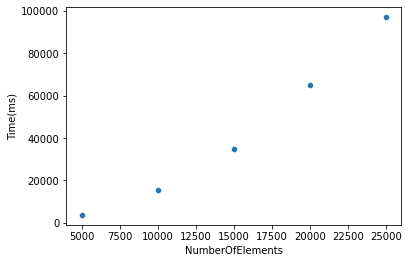

In [47]:
sns.scatterplot(x=df['NumberOfElements'], y=df['Time(ms)'])

## Fig 2. Square root of sort times in milliseconds as a function of the number of elements.

<AxesSubplot:xlabel='NumberOfElements', ylabel='rt(Time)'>

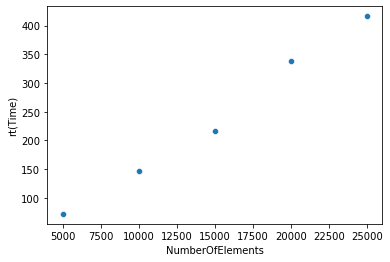

In [11]:
sns.scatterplot(x=df['NumberOfElements'], y=df['rt(Time)'])

# ------------------------ END ------------------------

    code graveyard 

In [12]:


### This code is for testing

#np.random.seed(123)
#arr7_39 = np.random.randint(low=7, high= 39, size=12)
#print("the array is",arr7_39)

#small = FindSmallest(arr7_39)
#print('the smallest index is at', small[0], 'and has value of', small[1])



#testing = SelectionSort(arr7_39)
#print('the array sorted is:', testing[0])
#print('execution time was: ', testing[1], 'ms')

the array is [37 20 37  9 35  9 13 24 26 17 34 32]
the smallest index is at 3 and has value of 9
the array sorted is: [9, 9, 13, 17, 20, 24, 26, 32, 34, 35, 37, 37]
execution time was:  0.4926999999952386 ms
